<a href="https://colab.research.google.com/github/jungeun919/Deep_learning/blob/main/Predict_Wine_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch 00001: val_loss improved from inf to 4.37891, saving model to ./model/01-4.3789.hdf5

Epoch 00002: val_loss improved from 4.37891 to 3.97497, saving model to ./model/02-3.9750.hdf5

Epoch 00003: val_loss improved from 3.97497 to 3.57577, saving model to ./model/03-3.5758.hdf5

Epoch 00004: val_loss improved from 3.57577 to 3.18992, saving model to ./model/04-3.1899.hdf5

Epoch 00005: val_loss improved from 3.18992 to 2.81945, saving model to ./model/05-2.8194.hdf5

Epoch 00006: val_loss improved from 2.81945 to 2.46193, saving model to ./model/06-2.4619.hdf5

Epoch 00007: val_loss improved from 2.46193 to 2.11700, saving model to ./model/07-2.1170.hdf5

Epoch 00008: val_loss improved from 2.11700 to 1.78341, saving model to ./model/08-1.7834.hdf5

Epoch 00009: val_loss improved from 1.78341 to 1.47264, saving model to ./model/09-1.4726.hdf5

Epoch 00010: val_loss improved from 1.47264 to 1.19044, saving model to ./model/10-1.1904.hdf5

Epoch 00011: val_loss improved from 1.19044

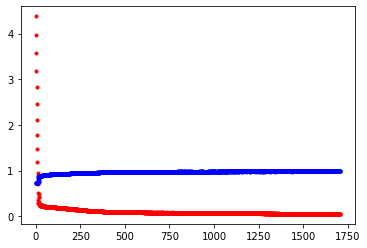

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

import pandas as pd
import numpy
import os
import tensorflow as tf

numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('wine.csv', header=None) # column 이름이 value 로 들어간다.
df = df_pre.sample(frac=0.15) # 전체 row에서 몇%의 데이터를 return할 것인지
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # metrics : 평가기준

# 모델 저장 폴더 만들기
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100) # monitor : 관찰하고자 하는 항목 / patience : 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정한다.

history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])

y_vloss = history.history['val_loss'] # 테스트셋 오차
y_acc = history.history['accuracy'] # 학습셋 정확도

x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()